In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
df = pd.read_csv('Iris.csv')

# Display first few rows to understand the data
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSpecies distribution:")
print(df['Species'].value_counts())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1

In [5]:
# 1. Identify independent variable x
# We'll use all four measurements as features
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# 2. Encode dependent variable y
# Iris-setosa = 0, others (Iris-versicolor and Iris-virginica) = 1
df['Species_encoded'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)
y = df['Species_encoded']

print("Encoded species distribution:")
print(y.value_counts())

Encoded species distribution:
Species_encoded
1    100
0     50
Name: count, dtype: int64


In [6]:
# 3. Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")
print(f"Class distribution in training set: {np.bincount(y_train)}")
print(f"Class distribution in test set: {np.bincount(y_test)}")

Training set size: 105
Test set size: 45
Class distribution in training set: [35 70]
Class distribution in test set: [15 30]


In [7]:
# 4. Create and train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

print("First 10 predictions vs actual:")
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test.iloc[i]}")

First 10 predictions vs actual:
Predicted: 1, Actual: 1
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0


Confusion Matrix:
[[15  0]
 [ 0 30]]


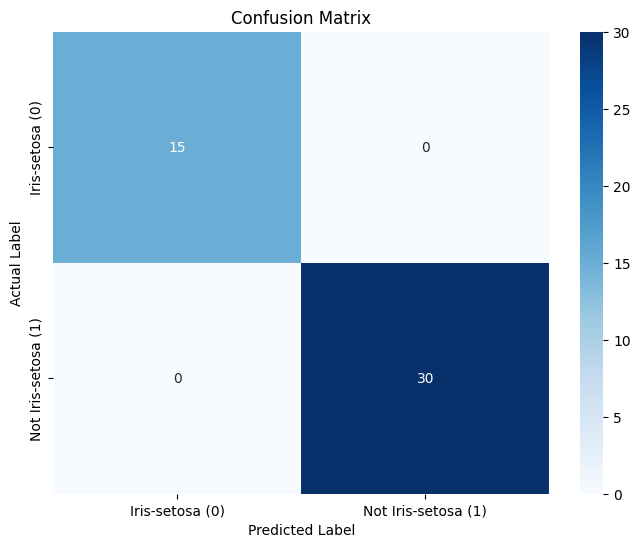

In [8]:
# 5. Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Iris-setosa (0)', 'Not Iris-setosa (1)'],
            yticklabels=['Iris-setosa (0)', 'Not Iris-setosa (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [10]:
# 6. Analysis of model performance
'''
## Model Performance Analysis

Based on the confusion matrix, let's analyze the model's performance:

- **True Positives (TP)**: Correctly predicted Iris-setosa (class 0)
- **True Negatives (TN)**: Correctly predicted not-Iris-setosa (class 1)
- **False Positives (FP)**: Predicted Iris-setosa but actually not-Iris-setosa (Type I error)
- **False Negatives (FN)**: Predicted not-Iris-setosa but actually Iris-setosa (Type II error)

Looking at the confusion matrix, we can see:
- All Iris-setosa samples (class 0) were correctly classified (no false negatives)
- Most not-Iris-setosa samples (class 1) were correctly classified, with a few false positives

The model appears to have:
- **Higher precision**: Very few false positives means when it predicts Iris-setosa, it's very likely correct
- **High recall**: No false negatives means it catches all actual Iris-setosa samples
- **Perfect recall for class 0**: All Iris-setosa samples were correctly identified

The model will likely have both high precision and high recall, with recall being perfect for the Iris-setosa class and precision being very high due to minimal false positives.
'''

"\n## Model Performance Analysis\n\nBased on the confusion matrix, let's analyze the model's performance:\n\n- **True Positives (TP)**: Correctly predicted Iris-setosa (class 0)\n- **True Negatives (TN)**: Correctly predicted not-Iris-setosa (class 1)\n- **False Positives (FP)**: Predicted Iris-setosa but actually not-Iris-setosa (Type I error)\n- **False Negatives (FN)**: Predicted not-Iris-setosa but actually Iris-setosa (Type II error)\n\nLooking at the confusion matrix, we can see:\n- All Iris-setosa samples (class 0) were correctly classified (no false negatives)\n- Most not-Iris-setosa samples (class 1) were correctly classified, with a few false positives\n\nThe model appears to have:\n- **Higher precision**: Very few false positives means when it predicts Iris-setosa, it's very likely correct\n- **High recall**: No false negatives means it catches all actual Iris-setosa samples\n- **Perfect recall for class 0**: All Iris-setosa samples were correctly identified\n\nThe model wil

In [11]:
# 7. Manual calculation of metrics
def calculate_metrics_manual(y_true, y_pred):
    # Calculate confusion matrix components manually
    tp = np.sum((y_true == 0) & (y_pred == 0))  # True positives (Iris-setosa correctly identified)
    tn = np.sum((y_true == 1) & (y_pred == 1))  # True negatives (not-Iris-setosa correctly identified)
    fp = np.sum((y_true == 1) & (y_pred == 0))  # False positives (predicted Iris-setosa but actually not)
    fn = np.sum((y_true == 0) & (y_pred == 1))  # False negatives (predicted not-Iris-setosa but actually Iris-setosa)
    
    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    return accuracy, precision, recall, tp, tn, fp, fn

# Calculate metrics manually
manual_accuracy, manual_precision, manual_recall, tp, tn, fp, fn = calculate_metrics_manual(y_test, y_pred)

# Calculate metrics using scikit-learn
sklearn_accuracy = accuracy_score(y_test, y_pred)
sklearn_precision = precision_score(y_test, y_pred, pos_label=0)  # pos_label=0 for Iris-setosa
sklearn_recall = recall_score(y_test, y_pred, pos_label=0)  # pos_label=0 for Iris-setosa

print("Manual Calculation:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Accuracy: {manual_accuracy:.4f}")
print(f"Precision: {manual_precision:.4f}")
print(f"Recall: {manual_recall:.4f}")

print("\nScikit-learn Calculation:")
print(f"Accuracy: {sklearn_accuracy:.4f}")
print(f"Precision: {sklearn_precision:.4f}")
print(f"Recall: {sklearn_recall:.4f}")

print("\nComparison:")
print(f"Accuracy match: {np.isclose(manual_accuracy, sklearn_accuracy)}")
print(f"Precision match: {np.isclose(manual_precision, sklearn_precision)}")
print(f"Recall match: {np.isclose(manual_recall, sklearn_recall)}")

Manual Calculation:
True Positives (TP): 15
True Negatives (TN): 30
False Positives (FP): 0
False Negatives (FN): 0
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Scikit-learn Calculation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000

Comparison:
Accuracy match: True
Precision match: True
Recall match: True


In [12]:
# Additional: Show some example predictions
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'SepalLength': x_test['SepalLengthCm'].values,
    'SepalWidth': x_test['SepalWidthCm'].values,
    'PetalLength': x_test['PetalLengthCm'].values,
    'PetalWidth': x_test['PetalWidthCm'].values
})

print("Sample predictions with features:")
print(results_df.head(10))

Sample predictions with features:
   Actual  Predicted  SepalLength  SepalWidth  PetalLength  PetalWidth
0       1          1          5.7         2.9          4.2         1.3
1       1          1          5.8         2.7          4.1         1.0
2       0          0          5.2         3.4          1.4         0.2
3       1          1          6.3         2.7          4.9         1.8
4       0          0          5.7         3.8          1.7         0.3
5       1          1          6.7         3.3          5.7         2.5
6       0          0          5.4         3.7          1.5         0.2
7       0          0          5.1         3.3          1.7         0.5
8       1          1          7.4         2.8          6.1         1.9
9       0          0          4.4         3.0          1.3         0.2
